# Set Up (No need to edit this section)

Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

import json
import numpy as np

Set up Cloud Directories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_folder_path = '/content/drive/MyDrive/CSC5218_Project_DL'
models_folder_path = os.path.join(project_folder_path, "saved models")
data_folder_path = os.path.join(project_folder_path, "data")
results_folder_path = os.path.join(project_folder_path, "results")

Unzip raw data in colab's vm

In [ ]:
raw_data_path = os.path.join(data_folder_path, 'raw', 'dataset.zip')
print(raw_data_path)

/content/drive/MyDrive/CSC5218_Project_DL/data/raw/dataset.zip


In [ ]:
!unzip $raw_data_path

Set up the dataset

In [ ]:
batch_size = 32
image_height = 512
image_width = 512
dataset_path = 'dataset'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3064 files belonging to 3 classes.
Using 2452 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 3064 files belonging to 3 classes.
Using 612 files for validation.


Looking at the data



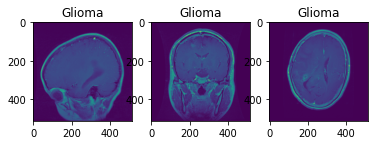

In [ ]:
fig, axs = plt.subplots(1,3)

image_batch = next(iter(train_ds)) # Grab a batch
for i in range(3):
  image = np.array(image_batch[0])[i] # Grab ith image
  label = np.array(image_batch[1])[i] # Grab ith label
  label_name = train_ds.class_names[label] # Get label name
  # Plot
  image_as_array = np.array(image).astype(np.uint8) 
  axs[i].set_title(label_name)
  axs[i].imshow(image_as_array)

# Model Specific Set Up (For you to edit)

Model specific paths

In [ ]:
my_model_name = 'Autoencoder' # !!! change to your model name !!!
my_model_version = 1 # !!! change to your model version (if applicable) !!!
my_model_folder_path = os.path.join(models_folder_path, 
                                    my_model_name, my_model_name+'_'+str(my_model_version))
my_model_save_path =  os.path.join(my_model_folder_path,
                                    my_model_name+'_'+str(my_model_version) + '.h5')
my_model_checkpoint_path = os.path.join(my_model_folder_path, 'checkpoints')
print('save model to:')
print(my_model_save_path)
print('save checkpoints to:') 
print(my_model_checkpoint_path)

save model to:
/content/drive/MyDrive/CSC5218_Project_DL/saved models/Autoencoder/Autoencoder_1/Autoencoder_1.h5
save checkpoints to:
/content/drive/MyDrive/CSC5218_Project_DL/saved models/Autoencoder/Autoencoder_1/checkpoints


For loading saved model, saved checkpoints, and setting up future checkpoints

In [ ]:
# Load a model if applicable (for further training)
model = tf.keras.models.load_model(my_model_save_path)

In [ ]:
# Load the weights if applicable (for further training after defining model)
# Don't need this if using the above cell
model.load_weights(my_model_checkpoint_path)

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
# Use this callback to train with checkpoints saved on drive
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=my_model_checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

In [ ]:
# Train model and so on...

# Save Model

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save(my_model_save_path)
print(my_model_save_path)